## Model no 4

Target:
+ life_ladder  

Features:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth
+ freedom_to_make_life_choices
+ perception of corruption

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 

In [2]:
sns.set_style("darkgrid")

model_name = 'model_04'

function section

In [3]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [4]:
df = pd.read_csv("../data/life_ladder_2005_2022_no4_gdp_sosupp_lifeexp_freed_corrupt.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2001 non-null   object 
 1   year                              2001 non-null   int64  
 2   life_ladder                       2001 non-null   float64
 3   log_gdp_per_capita                2001 non-null   float64
 4   social_support                    2001 non-null   float64
 5   healthy_life_expectancy_at_birth  2001 non-null   float64
 6   freedom_to_make_life_choices      2001 non-null   float64
 7   perceptions_of_corruption         2001 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 125.2+ KB


Define features and Target:

In [6]:
features = df.columns.tolist()
features.remove('country_name')
features.remove('year')
features.remove('life_ladder')

X = df[features]
y = df['life_ladder']

In [7]:
X.columns

Index(['log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'perceptions_of_corruption'],
      dtype='object')

In [8]:
print(X.shape, y.shape)

(2001, 5) (2001,)


Train-Test-Split:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1400, 5) (601, 5) (1400,) (601,)


In [11]:
X_train.describe()

,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,9.335255,0.808082,63.151829,0.749187,0.745790
std,1.172069,0.123748,6.922004,0.138421,0.181895
min,5.935000,0.303000,17.360000,0.295000,0.035000
25%,8.422500,0.740000,58.515000,0.656000,0.691000
50%,9.496500,0.835500,64.890000,0.770500,0.799000
75%,10.312500,0.906000,68.600000,0.861000,0.866000
max,11.664000,0.987000,74.475000,0.985000,0.983000


Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scatterplot with scaled and non-scaled data, both features (correlation)

In [13]:
X_train_scaled.shape

(1400, 5)

In [14]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

<Axes: xlabel='perceptions_of_corruption', ylabel='life_ladder'>

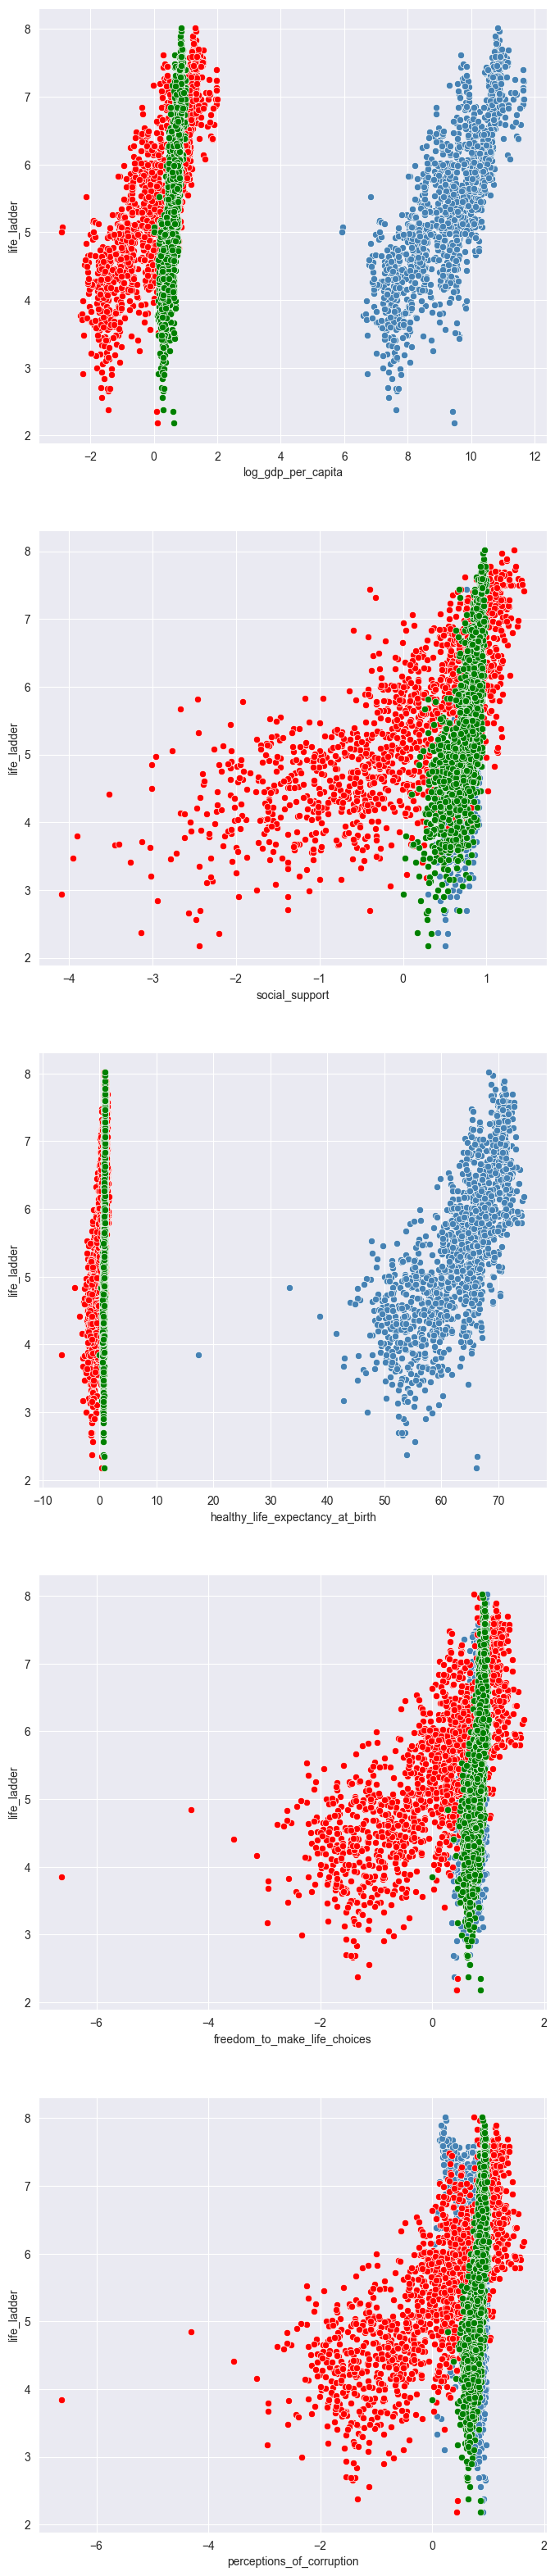

In [15]:
fig,ax = plt.subplots(5,1,figsize=(8,40))
sns.scatterplot(ax= ax[0], x = X_train.log_gdp_per_capita, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[0], x = X_train_scaled[:,0], y = y_train, color = 'red')
sns.scatterplot(ax= ax[0], x = X_train_normalized[:,0], y = y_train, color = 'green')
sns.scatterplot(ax= ax[1], x = X_train.social_support, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[1], x = X_train_scaled[:,1], y = y_train, color = 'red')
sns.scatterplot(ax= ax[1], x = X_train_normalized[:,1], y = y_train, color = 'green')
sns.scatterplot(ax= ax[2], x = X_train.healthy_life_expectancy_at_birth, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[2], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[2], x = X_train_normalized[:,2], y = y_train, color = 'green')
sns.scatterplot(ax= ax[3], x = X_train.freedom_to_make_life_choices, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[3], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[3], x = X_train_normalized[:,2], y = y_train, color = 'green')
sns.scatterplot(ax= ax[4], x = X_train.perceptions_of_corruption, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[4], x = X_train_scaled[:,2], y = y_train, color = 'red')
sns.scatterplot(ax= ax[4], x = X_train_normalized[:,2], y = y_train, color = 'green')

Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [16]:
lin_reg_error_lst = []

for i in range(1,5):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train_scaled)
    x_poly_test = polynomial_features.transform(X_test_scaled)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    rmse_test = mean_squared_error(y_test, y_pred_poly_test, squared=False).round(3)
    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test_scaled).round(3)
    rmse_train = mean_squared_error(y_train, y_pred_poly_train, squared=False).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train_scaled).round(3)
    
    mae_test = mean_absolute_error(y_test, y_pred_poly_test).round(3)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_poly_test).round(3)
    mae_train = mean_absolute_error(y_train, y_pred_poly_train).round(3)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_poly_train).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    delta_mae = abs(mae_train - mae_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_04_lin_reg_1,0.566,0.752,0.438,0.088,0.588,0.735,0.452,0.092,0.022,0.014,0.017
1,model_04_lin_reg_2,0.526,0.786,0.406,0.081,0.550,0.768,0.426,0.086,0.024,0.020,0.018
2,model_04_lin_reg_3,0.505,0.803,0.387,0.077,0.552,0.767,0.429,0.087,0.047,0.042,0.036
3,model_04_lin_reg_4,0.462,0.835,0.352,0.070,0.847,0.451,0.445,0.093,0.385,0.093,0.384


lin_reg_sc = LinearRegression()
lin_reg_sc.fit(X_train_scaled,y_train)

y_pred_linreg_test = lin_reg_sc.predict(X_test_normalized)
y_pred_linreg_train = lin_reg_sc.predict(X_train_normalized)

rmse_test = mean_squared_error(y_test, y_pred_linreg_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_linreg_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_linreg_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_linreg_train, X_train).round(3)

delta_rmse = abs(rmse_train - rmse_test)
delta_r2 = abs(r2_train - r2_test)

lin_reg_error_lst.append({'model_name': model_name + '_lin_reg_scaled', 
                        'train_rmse': rmse_train, 
                        'train_r2':r2_train, 
                        'test_rmse': rmse_test, 
                        'test_r2':r2_test,
                        'delta_RMSE':delta_rmse,
                        'delta_R2':delta_r2})

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51836/1933425063.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


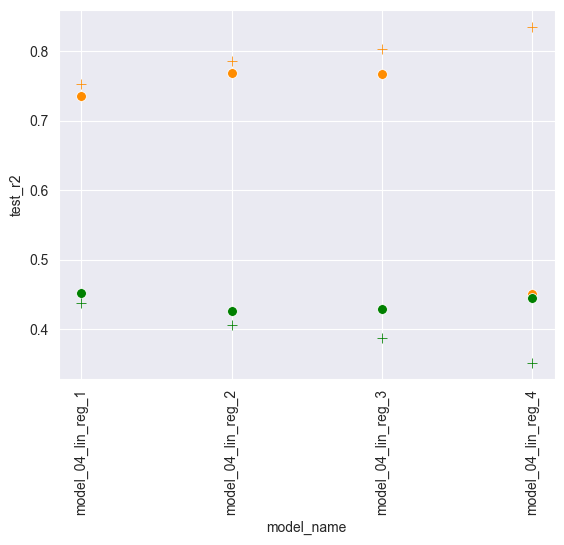

In [17]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [18]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_04_lin_reg_scaler_0,0.751
1,model_04_lin_reg_scaler_1,0.751
2,model_04_lin_reg_scaler_2,0.751


part df with the best models:

In [19]:
part_lin_reg = lin_reg_error_df.sort_values(by =['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:3]
part_lin_reg

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
1,model_04_lin_reg_2,0.526,0.786,0.406,0.081,0.550,0.768,0.426,0.086,0.024,0.020,0.018
2,model_04_lin_reg_3,0.505,0.803,0.387,0.077,0.552,0.767,0.429,0.087,0.047,0.042,0.036
0,model_04_lin_reg_1,0.566,0.752,0.438,0.088,0.588,0.735,0.452,0.092,0.022,0.014,0.017


---

### KNN Model 

+ with variable number of neighbors and variable distance metrics
+ unscaled!! - now with standart scaler

In [20]:
knn_error_lst = []
for metr in range(1,4):
    for neigh in np.arange(30,51,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr, weights='uniform')
        knn.fit(X_train_scaled, y_train)

        y_pred_knn_test = knn.predict(X_test_scaled)
        y_pred_knn_train = knn.predict(X_train_scaled)
        rmse_test = mean_squared_error(y_test, y_pred_knn_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test_scaled).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_knn_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train_scaled).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_knn_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_knn_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_knn_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_knn_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_knn_' + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
#knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])
#knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_04_knn_1_30,0.490,0.814,0.376,0.077,0.539,0.778,0.415,0.085,0.049,0.039,0.036
5,model_04_knn_2_30,0.494,0.811,0.379,0.077,0.542,0.776,0.417,0.085,0.048,0.038,0.035
1,model_04_knn_1_35,0.498,0.808,0.383,0.078,0.545,0.773,0.418,0.086,0.047,0.035,0.035
6,model_04_knn_2_35,0.501,0.805,0.385,0.078,0.546,0.772,0.421,0.086,0.045,0.036,0.033
2,model_04_knn_1_40,0.505,0.802,0.388,0.079,0.549,0.770,0.422,0.087,0.044,0.034,0.032
10,model_04_knn_3_30,0.499,0.807,0.382,0.078,0.548,0.771,0.422,0.087,0.049,0.040,0.036
11,model_04_knn_3_35,0.506,0.802,0.387,0.079,0.552,0.767,0.423,0.087,0.046,0.036,0.035
3,model_04_knn_1_45,0.510,0.799,0.391,0.080,0.552,0.767,0.425,0.087,0.042,0.034,0.032
7,model_04_knn_2_40,0.508,0.800,0.390,0.079,0.551,0.768,0.425,0.087,0.043,0.035,0.032
12,model_04_knn_3_40,0.514,0.796,0.393,0.080,0.555,0.765,0.427,0.088,0.041,0.034,0.031


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51836/1622020098.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


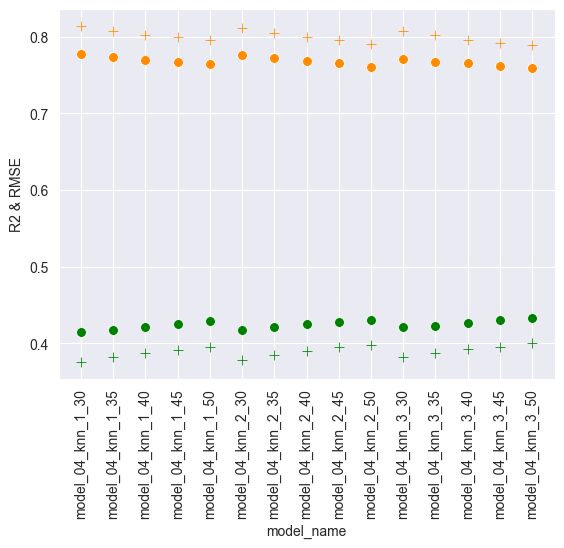

In [21]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [22]:
#part_knn = knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:5]
#part_knn = knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
#part_knn = knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_knn = knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:6]
part_knn

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_04_knn_1_30,0.490,0.814,0.376,0.077,0.539,0.778,0.415,0.085,0.049,0.039,0.036
5,model_04_knn_2_30,0.494,0.811,0.379,0.077,0.542,0.776,0.417,0.085,0.048,0.038,0.035
1,model_04_knn_1_35,0.498,0.808,0.383,0.078,0.545,0.773,0.418,0.086,0.047,0.035,0.035
6,model_04_knn_2_35,0.501,0.805,0.385,0.078,0.546,0.772,0.421,0.086,0.045,0.036,0.033
2,model_04_knn_1_40,0.505,0.802,0.388,0.079,0.549,0.770,0.422,0.087,0.044,0.034,0.032
10,model_04_knn_3_30,0.499,0.807,0.382,0.078,0.548,0.771,0.422,0.087,0.049,0.040,0.036


scaling data

In [23]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 40, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
1,model_04_knn_scaler_1,0.787
2,model_04_knn_scaler_2,0.784
0,model_04_knn_scaler_0,0.741


Decision Tree Model

In [24]:
dtree = DecisionTreeRegressor(max_depth = 5, 
                            max_leaf_nodes = 10)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10)

In [25]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

train_rmse  0.542
train_r2  0.772
train_mae  0.424
train_mape  0.084
test_rmse  0.593
test_r2  0.731
test_mae  0.458
test_mape  0.092


In [26]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

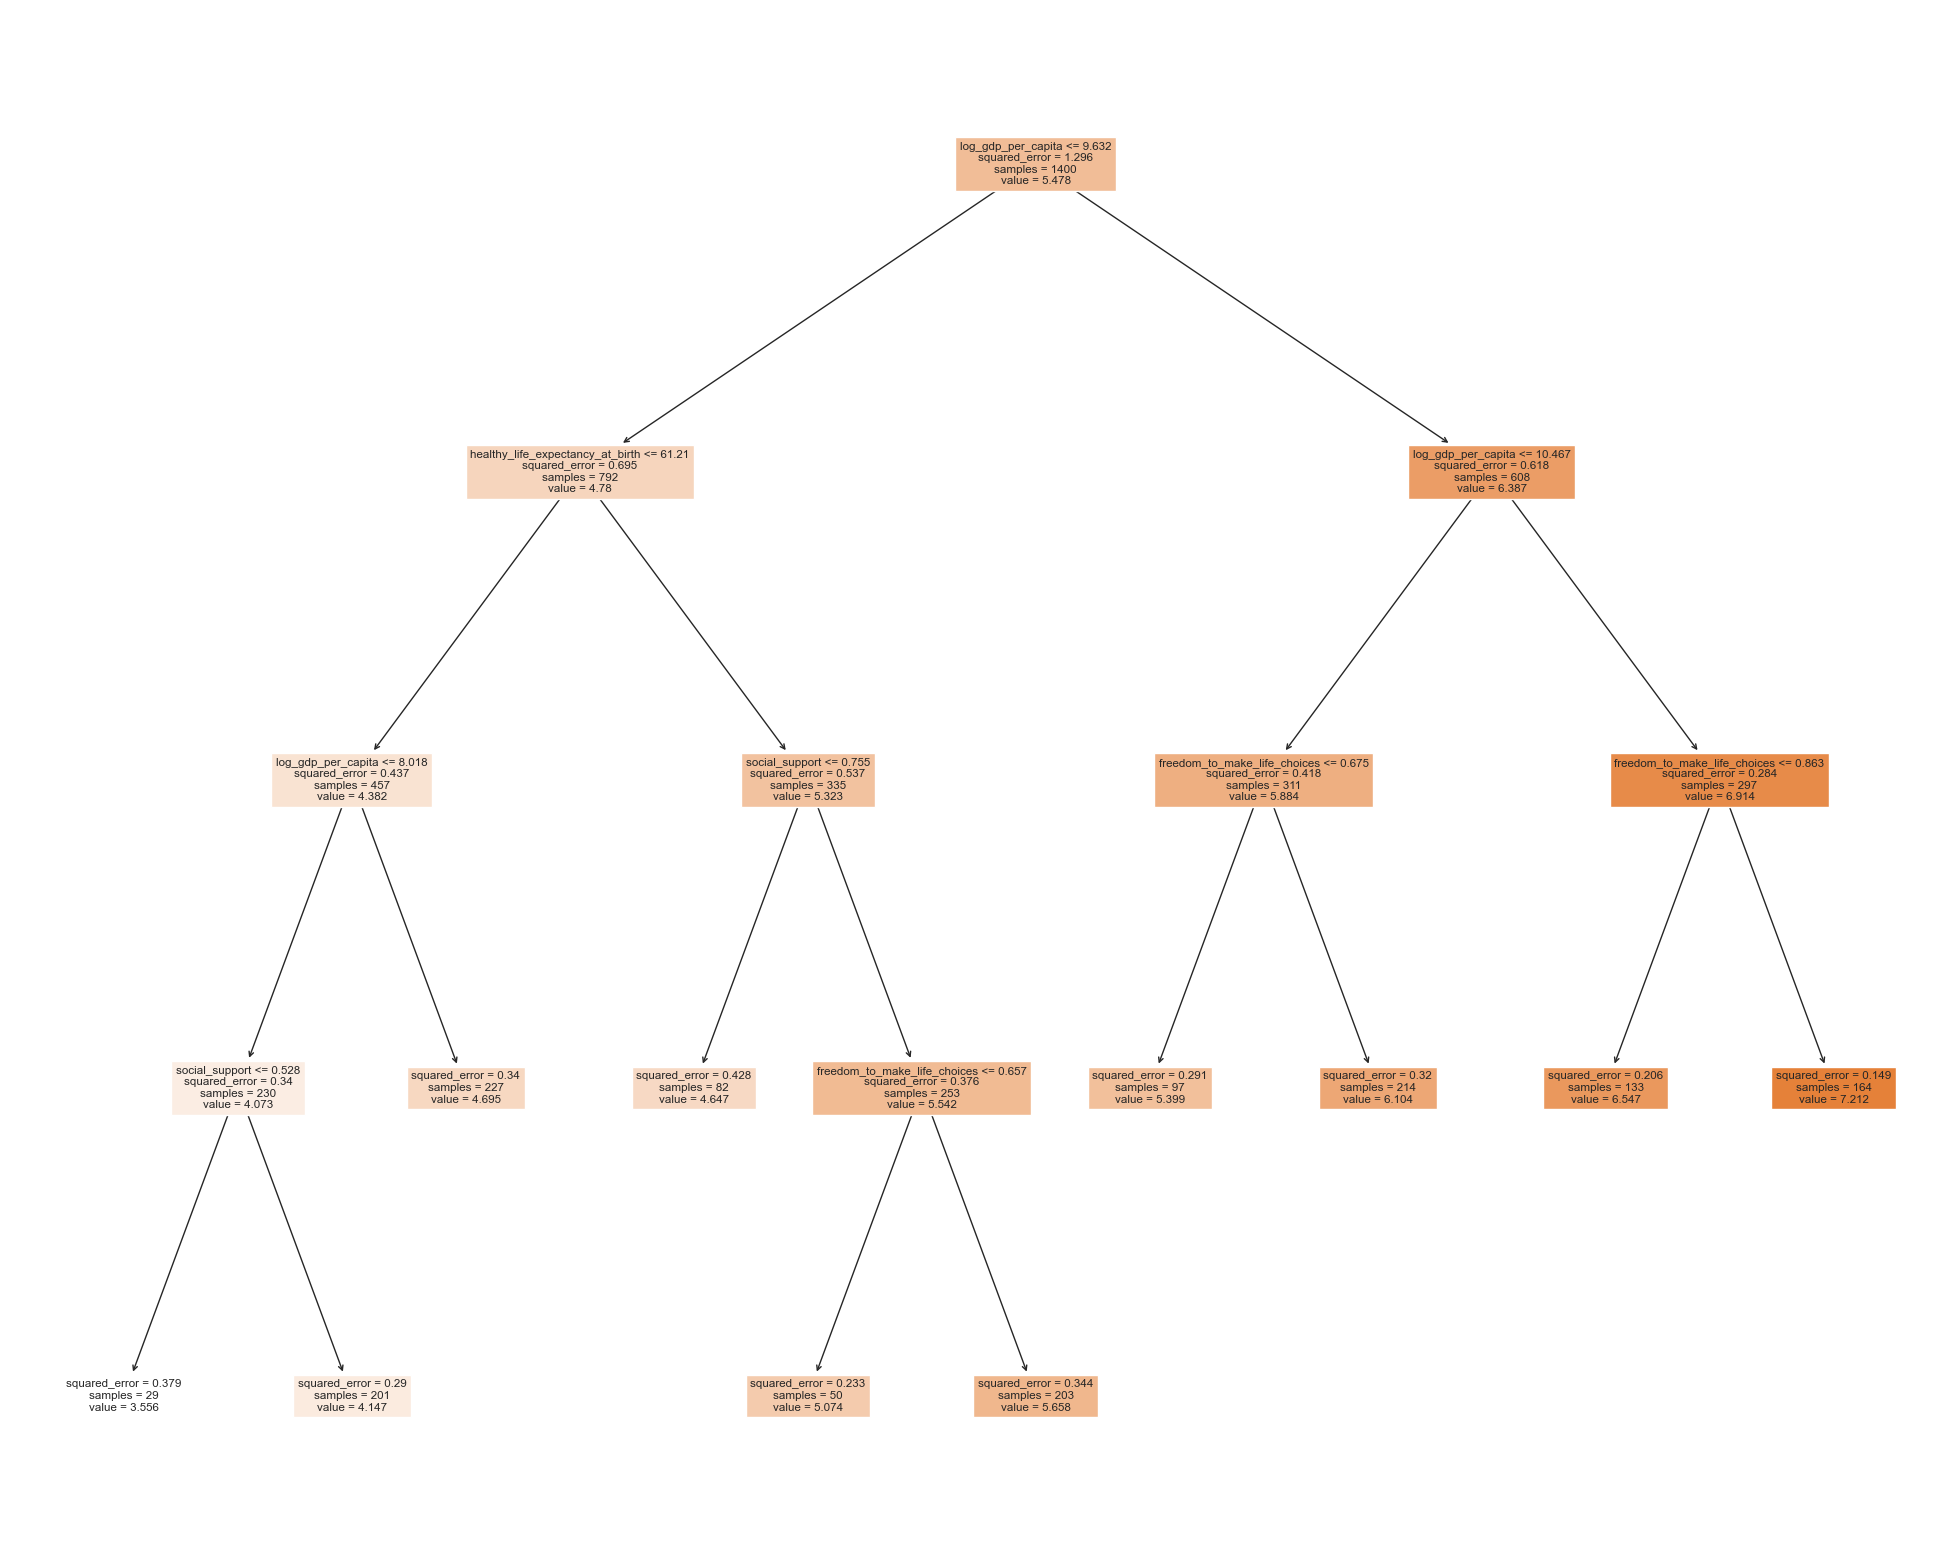

In [27]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [28]:
dectree_error_lst = []
for depth in np.arange(5,8,1):
    for leaf in np.arange(10,71,5): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df.sort_values(by = ['delta_R2', 'test_r2'] , ascending=[True, False])
#dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_04_dectree_dep_5_max_leaf_10,0.542,0.772,0.424,0.084,0.593,0.731,0.458,0.092,0.051,0.034,0.041
13,model_04_dectree_dep_6_max_leaf_10,0.542,0.772,0.424,0.084,0.593,0.731,0.458,0.092,0.051,0.034,0.041
26,model_04_dectree_dep_7_max_leaf_10,0.542,0.772,0.424,0.084,0.593,0.731,0.458,0.092,0.051,0.034,0.041
1,model_04_dectree_dep_5_max_leaf_15,0.519,0.791,0.410,0.081,0.588,0.736,0.454,0.091,0.069,0.044,0.055
14,model_04_dectree_dep_6_max_leaf_15,0.519,0.791,0.410,0.081,0.588,0.736,0.454,0.091,0.069,0.044,0.055
27,model_04_dectree_dep_7_max_leaf_15,0.519,0.791,0.410,0.081,0.588,0.736,0.454,0.091,0.069,0.044,0.055
2,model_04_dectree_dep_5_max_leaf_20,0.500,0.806,0.390,0.077,0.574,0.748,0.445,0.089,0.074,0.055,0.058
15,model_04_dectree_dep_6_max_leaf_20,0.500,0.806,0.390,0.077,0.574,0.748,0.445,0.089,0.074,0.055,0.058
28,model_04_dectree_dep_7_max_leaf_20,0.500,0.806,0.390,0.077,0.574,0.748,0.445,0.089,0.074,0.055,0.058
5,model_04_dectree_dep_5_max_leaf_35,0.475,0.825,0.367,0.073,0.562,0.758,0.432,0.087,0.087,0.065,0.067


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51836/2885455363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


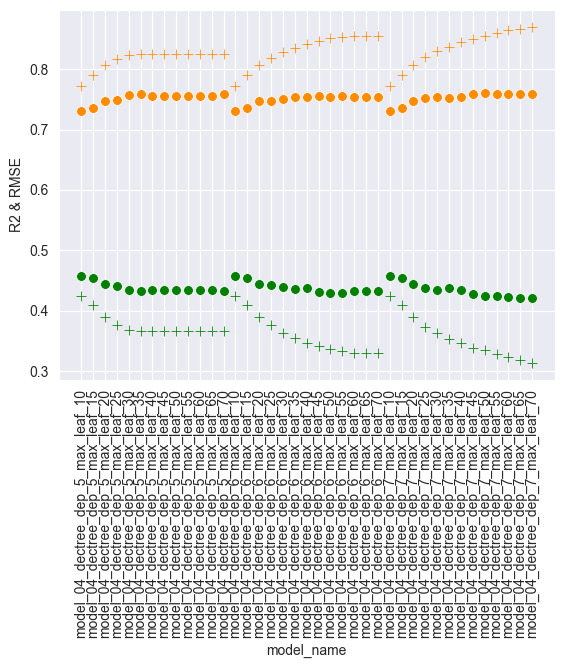

In [29]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

+ It is hard to decide which one is the optimum. But still everything is lower than knn, so we don't have to put so much effort in it.  

part df for the best models:

In [30]:
#part_dec_tree = dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:6]
part_dec_tree = dectree_error_df.sort_values(by = ['delta_R2', 'test_r2'] , ascending=[True, False]).iloc[:6]
part_dec_tree

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_04_dectree_dep_5_max_leaf_10,0.542,0.772,0.424,0.084,0.593,0.731,0.458,0.092,0.051,0.034,0.041
13,model_04_dectree_dep_6_max_leaf_10,0.542,0.772,0.424,0.084,0.593,0.731,0.458,0.092,0.051,0.034,0.041
26,model_04_dectree_dep_7_max_leaf_10,0.542,0.772,0.424,0.084,0.593,0.731,0.458,0.092,0.051,0.034,0.041
1,model_04_dectree_dep_5_max_leaf_15,0.519,0.791,0.410,0.081,0.588,0.736,0.454,0.091,0.069,0.044,0.055
14,model_04_dectree_dep_6_max_leaf_15,0.519,0.791,0.410,0.081,0.588,0.736,0.454,0.091,0.069,0.044,0.055
27,model_04_dectree_dep_7_max_leaf_15,0.519,0.791,0.410,0.081,0.588,0.736,0.454,0.091,0.069,0.044,0.055


Random Forest 

In [31]:
randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 4,
                                max_leaf_nodes = 20,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_randforest_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_randforest_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_randforest_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_randforest_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

Min number of nodes: 29
Average number of nodes: 30
Max number of nodes: 31
Min maximum depth: 4
Average maximum depth: 4
Max maximum depth: 4
Number of Trees: 100
train_rmse  0.49
train_r2  0.814
train_mae  0.375
train_mape  0.076
test_rmse  0.539
test_r2  0.778
test_mae  0.417
test_mape  0.085


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [32]:
randforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 20,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [33]:
random_trees_error_lst = []
for tree_depth in np.arange(4,7,1):
    for tree_leaf in np.arange(10,21,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_random_forest_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_random_forest_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_random_forest_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_random_forest_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2,
                      'mean_node_num': mean_node_num,
                      'mean_depth': mean_depth,
                      'num_of_trees': num_of_trees}) 
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
6,model_04_forest_tree_depth6_max_leaf_10,0.509,0.799,0.391,0.079,0.554,0.766,0.431,0.088,0.045,0.040,0.033,19,4,100
0,model_04_forest_tree_depth4_max_leaf_10,0.510,0.798,0.392,0.079,0.554,0.765,0.432,0.088,0.044,0.040,0.033,19,4,100
3,model_04_forest_tree_depth5_max_leaf_10,0.509,0.800,0.391,0.079,0.553,0.766,0.431,0.088,0.044,0.040,0.034,19,4,100
2,model_04_forest_tree_depth4_max_leaf_20,0.490,0.814,0.375,0.076,0.539,0.778,0.417,0.085,0.049,0.042,0.036,30,4,100
1,model_04_forest_tree_depth4_max_leaf_15,0.492,0.813,0.376,0.076,0.539,0.777,0.418,0.085,0.047,0.042,0.036,29,4,100
4,model_04_forest_tree_depth5_max_leaf_15,0.485,0.818,0.372,0.075,0.536,0.781,0.415,0.085,0.051,0.043,0.037,29,5,100
7,model_04_forest_tree_depth6_max_leaf_15,0.485,0.818,0.372,0.075,0.537,0.780,0.415,0.085,0.052,0.043,0.038,29,5,100
5,model_04_forest_tree_depth5_max_leaf_20,0.468,0.830,0.360,0.072,0.526,0.788,0.407,0.083,0.058,0.047,0.042,39,5,100
8,model_04_forest_tree_depth6_max_leaf_20,0.466,0.832,0.359,0.072,0.526,0.788,0.406,0.083,0.060,0.047,0.044,39,5,100


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51836/4267177350.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


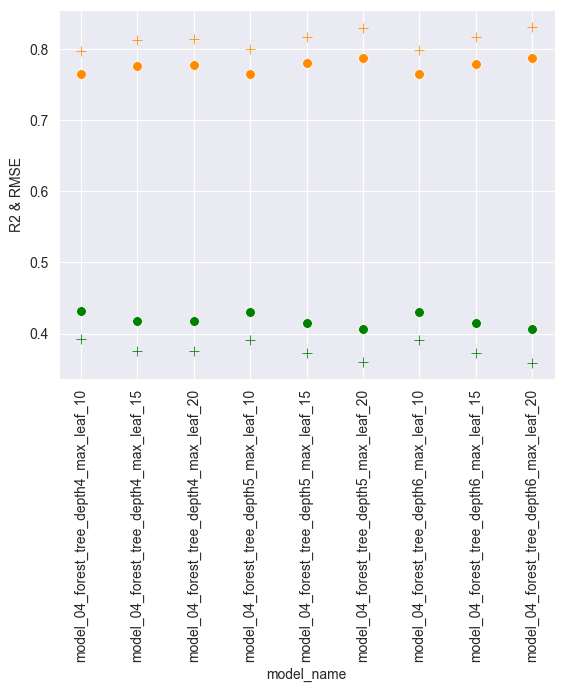

In [34]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

Like in the decision tree model max_depth = 3 and max_leaf_node = 8 is the optimum, we can just choose this combination

In [35]:
#part_forest = random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:4]
part_forest = random_trees_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:7]
part_forest

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
6,model_04_forest_tree_depth6_max_leaf_10,0.509,0.799,0.391,0.079,0.554,0.766,0.431,0.088,0.045,0.040,0.033,19,4,100
0,model_04_forest_tree_depth4_max_leaf_10,0.510,0.798,0.392,0.079,0.554,0.765,0.432,0.088,0.044,0.040,0.033,19,4,100
3,model_04_forest_tree_depth5_max_leaf_10,0.509,0.800,0.391,0.079,0.553,0.766,0.431,0.088,0.044,0.040,0.034,19,4,100
2,model_04_forest_tree_depth4_max_leaf_20,0.490,0.814,0.375,0.076,0.539,0.778,0.417,0.085,0.049,0.042,0.036,30,4,100
1,model_04_forest_tree_depth4_max_leaf_15,0.492,0.813,0.376,0.076,0.539,0.777,0.418,0.085,0.047,0.042,0.036,29,4,100
4,model_04_forest_tree_depth5_max_leaf_15,0.485,0.818,0.372,0.075,0.536,0.781,0.415,0.085,0.051,0.043,0.037,29,5,100
7,model_04_forest_tree_depth6_max_leaf_15,0.485,0.818,0.372,0.075,0.537,0.780,0.415,0.085,0.052,0.043,0.038,29,5,100


Test: AdaBoostRegressor

In [36]:
ada = AdaBoostRegressor(n_estimators=50, random_state=8)
ada.fit(X_train, y_train)

y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                    'train_rmse': mean_squared_error(y_train, y_pred_ada_train, squared=False).round(3), 
                    'train_r2':r2_score(y_train, y_pred_ada_train).round(3), 
                    'train_mae': mean_absolute_error(y_train, y_pred_ada_train).round(3),
                    'train_mape': mean_absolute_percentage_error(y_train, y_pred_ada_train).round(3),
                    'test_rmse': mean_squared_error(y_test, y_pred_ada_test, squared=False).round(3), 
                    'test_r2':r2_score(y_test, y_pred_ada_test).round(3),
                    'test_mae': mean_absolute_error(y_test, y_pred_ada_test).round(3),
                    'test_mape': mean_absolute_percentage_error(y_test, y_pred_ada_test).round(3)
                    }])

ada_boost_error['delta_RMSE'] = abs(ada_boost_error['train_rmse'] - ada_boost_error['test_rmse'])
ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error['delta_MAE'] = abs(ada_boost_error['train_mae'] - ada_boost_error['test_mae'])
ada_boost_error

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_R2,delta_MAE
0,model_04_ada_boost,0.503,0.804,0.413,0.081,0.57,0.754,0.455,0.091,0.067,0.05,0.042


that is really nice!!

In [37]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 8}

Test:  GradientBoostingRegressor

In [38]:
gbr = GradientBoostingRegressor(n_estimators=50,
                                criterion= 'squared_error',
                                max_depth = 4, 
                                max_leaf_nodes = 14,
                                random_state=123)
gbr.fit(X_train, y_train)


y_pred_gbr_test = gbr.predict(X_test)
y_pred_gbr_train = gbr.predict(X_train)

gbr_boost_error = pd.DataFrame([{'model_name': model_name + '_gbr_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_gbr_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_gbr_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_gbr_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_gbr_test, X_test).round(3)}])

gbr_boost_error['delta_RMSE'] = abs(gbr_boost_error['train_rmse'] - gbr_boost_error['test_rmse'])
gbr_boost_error['delta_R2'] = abs(gbr_boost_error['train_r2'] - gbr_boost_error['test_r2'])
gbr_boost_error


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_04_gbr_boost,0.392,0.881,0.504,0.806,0.112,0.075


In [39]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 14,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Concat the optimal models of each algorithm to one big error_df:  

In [40]:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      gbr_boost_error],  axis = 0)
                      
error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_04_lin_reg_1,0.566,0.752,0.438,0.088,0.588,0.735,0.452,0.092,0.022,0.014,0.017,NaN,NaN,NaN
1,model_04_lin_reg_2,0.526,0.786,0.406,0.081,0.550,0.768,0.426,0.086,0.024,0.020,0.018,NaN,NaN,NaN
2,model_04_knn_1_40,0.505,0.802,0.388,0.079,0.549,0.770,0.422,0.087,0.044,0.034,0.032,NaN,NaN,NaN
6,model_04_knn_2_35,0.501,0.805,0.385,0.078,0.546,0.772,0.421,0.086,0.045,0.036,0.033,NaN,NaN,NaN
6,model_04_forest_tree_depth6_max_leaf_10,0.509,0.799,0.391,0.079,0.554,0.766,0.431,0.088,0.045,0.040,0.033,19.0,4.0,100.0
0,model_04_forest_tree_depth4_max_leaf_10,0.510,0.798,0.392,0.079,0.554,0.765,0.432,0.088,0.044,0.040,0.033,19.0,4.0,100.0
3,model_04_forest_tree_depth5_max_leaf_10,0.509,0.800,0.391,0.079,0.553,0.766,0.431,0.088,0.044,0.040,0.034,19.0,4.0,100.0
5,model_04_knn_2_30,0.494,0.811,0.379,0.077,0.542,0.776,0.417,0.085,0.048,0.038,0.035,NaN,NaN,NaN
1,model_04_knn_1_35,0.498,0.808,0.383,0.078,0.545,0.773,0.418,0.086,0.047,0.035,0.035,NaN,NaN,NaN
0,model_04_knn_1_30,0.490,0.814,0.376,0.077,0.539,0.778,0.415,0.085,0.049,0.039,0.036,NaN,NaN,NaN


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_51836/4059825178.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


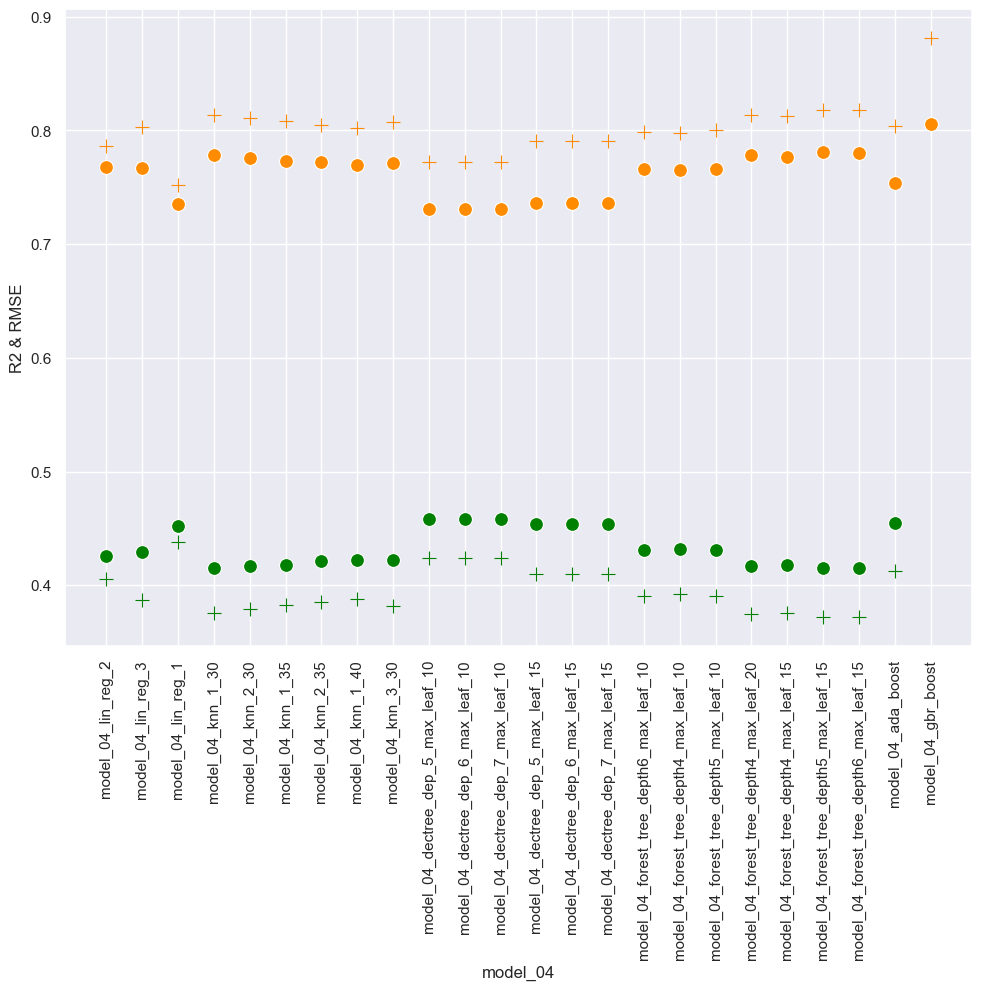

In [41]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_mae', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
g.set(xlabel=model_name)
plt.show();

In [42]:
error_df.to_csv(f'Metrics_Summary_{model_name}.txt', index=False)